**#Problem Statement-4 : Create a deep learning model that can detect if osteoarthritis is present or not in a given knee X-ray image.**

**Introduction:** Deep Learning has proven to be a powerful tool for "Pattern Recognition" that handles huge amounts of data. The use of hidden layers is the extra-ordinary techniques over the Traditional. One of the most popular Deep Neural Networks is Convolutional Neural Networks(CNN).

**Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

 **Loading the Other Dependencies.**



**A Sequential model** is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. 

A convoluted image can be too large and so it is reduced without losing features or patterns, so **pooling** is done. 

Here, Creating a Neural network is to initialize the network using the Sequential model from Keras.

**Flatten**- Flattening transforms a two-dimensional matrix of features into a vector of features.

**Dense** is used to make this a fully connected model and is the hidden layer. 
**Dropout** is used to avoid overfitting on the dataset. 
**Dense** is the output layer contains only one neuron which decide to which category image belongs.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")   #Adding the Output Layer
])


**Display the Summary of the CNN Model**

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

# **Setting the data directory and generate image data.**





We will split the dataset into three sets - train, validation, and test. We define the paths where our data is stored. There are three separate directories for train, validation, and test data. In each of these directories, there are two folders- one containing Osteoarthritis images and the other containing normal images.

In [ ]:
bs=30         #Setting batch size
train_dir = "/content/drive/MyDrive/internship_DL/train"   #Setting training directory
validation_dir = "/content/drive/MyDrive/internship_DL/Valid"   #Setting testing directory
test_dir = "/content/drive/MyDrive/internship_DL/test" 

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))
testdata_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.
Found 845 images belonging to 2 classes.


# **Specify the Optimizers**

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['acc'])

Optimizer is used to reduce the cost calculated by cross-entropy

The loss function is used to **calculate the error**

The metrics term is used to represent the efficiency of the model

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=50,
                    validation_steps=50 // bs,
                    verbose=2)

Epoch 1/50
5/5 - 13s - loss: 0.6570 - acc: 0.6467 - val_loss: 0.6291 - val_acc: 0.7000 - 13s/epoch - 3s/step
Epoch 2/50
5/5 - 6s - loss: 0.6662 - acc: 0.6533 - val_loss: 0.5549 - val_acc: 0.8000 - 6s/epoch - 1s/step
Epoch 3/50
5/5 - 6s - loss: 0.6363 - acc: 0.7400 - val_loss: 0.6414 - val_acc: 0.6667 - 6s/epoch - 1s/step
Epoch 4/50
5/5 - 6s - loss: 0.6519 - acc: 0.6467 - val_loss: 0.6629 - val_acc: 0.6000 - 6s/epoch - 1s/step
Epoch 5/50
5/5 - 6s - loss: 0.6325 - acc: 0.6733 - val_loss: 0.5585 - val_acc: 0.8000 - 6s/epoch - 1s/step
Epoch 6/50
5/5 - 8s - loss: 0.6321 - acc: 0.6600 - val_loss: 0.6463 - val_acc: 0.6000 - 8s/epoch - 2s/step
Epoch 7/50
5/5 - 6s - loss: 0.6359 - acc: 0.6333 - val_loss: 0.6287 - val_acc: 0.6000 - 6s/epoch - 1s/step
Epoch 8/50
5/5 - 6s - loss: 0.5859 - acc: 0.6800 - val_loss: 0.4612 - val_acc: 0.7667 - 6s/epoch - 1s/step
Epoch 9/50
5/5 - 6s - loss: 0.6632 - acc: 0.5667 - val_loss: 0.5381 - val_acc: 0.8000 - 6s/epoch - 1s/step
Epoch 10/50
5/5 - 6s - loss: 0.5989

The above function trains the neural network using the training set and evaluates its performance on the test set. The functions return two metrics for each epoch **‘acc**’ and **'val_acc’** which are the **accuracy of predictions obtained in the training set** and a**ccuracy attained in the test set respectively.**

In [ ]:
model.save('/content/drive/MyDrive/internship_DL/Models')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/internship_DL/Models')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/internship_DL/test/Normal/9000622L.png")

In [ ]:
classes = loaded_model.predict(testdata_generator, batch_size=10)

In [ ]:
testdata_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))

Found 845 images belonging to 2 classes.


In [ ]:
predictions = []
for i in range(0,len(classes)):
    prediction = np.argmax(classes, axis = 1, out = None)
    predictions.append(prediction)

In [ ]:
testdata_generator.filenames

['Normal/9000622L.png',
 'Normal/9000622R.png',
 'Normal/9001104L.png',
 'Normal/9002316L.png',
 'Normal/9002316R.png',
 'Normal/9003430R.png',
 'Normal/9004175L.png',
 'Normal/9006723R.png',
 'Normal/9008322R.png',
 'Normal/9008561L.png',
 'Normal/9008561R.png',
 'Normal/9012435L.png',
 'Normal/9012435R.png',
 'Normal/9013634L.png',
 'Normal/9013798R.png',
 'Normal/9014797R.png',
 'Normal/9016403L.png',
 'Normal/9019287R.png',
 'Normal/9022197R.png',
 'Normal/9025257R.png',
 'Normal/9025994R.png',
 'Normal/9027189L.png',
 'Normal/9027189R.png',
 'Normal/9029415R.png',
 'Normal/9029791R.png',
 'Normal/9031930R.png',
 'Normal/9034644R.png',
 'Normal/9036316L.png',
 'Normal/9036316R.png',
 'Normal/9036771L.png',
 'Normal/9038962L.png',
 'Normal/9039627R.png',
 'Normal/9040456R.png',
 'Normal/9040958R.png',
 'Normal/9041458L.png',
 'Normal/9041458R.png',
 'Normal/9042892L.png',
 'Normal/9042892R.png',
 'Normal/9043894L.png',
 'Normal/9044788L.png',
 'Normal/9046012R.png',
 'Normal/9049895

In [ ]:
classes

array([[0.37983054, 0.62016946],
       [0.00339297, 0.99660707],
       [0.27129945, 0.7287005 ],
       ...,
       [0.3558005 , 0.64419955],
       [0.3517254 , 0.64827454],
       [0.37040213, 0.6295979 ]], dtype=float32)

In [ ]:
label = model.predict(testdata_generator)

In [ ]:
labelmap = {0:"Normal"  , 1:"Osteoarthritis"}
print("Predicted Class (0 - Normal  , 1-Osteoarthritis ): ", labelmap[np.argmax(label[0])])
print("Predicted Class (0 - Normal  , 1-Osteoarthritis ): ", label[0][0])

Predicted Class (0 - Normal  , 1-Osteoarthritis ):  Osteoarthritis
Predicted Class (0 - Normal  , 1-Osteoarthritis ):  0.33951968


In [ ]:
image_names = testdata_generator.filenames

In [ ]:
image_names

['Normal/9000622L.png',
 'Normal/9000622R.png',
 'Normal/9001104L.png',
 'Normal/9002316L.png',
 'Normal/9002316R.png',
 'Normal/9003430R.png',
 'Normal/9004175L.png',
 'Normal/9006723R.png',
 'Normal/9008322R.png',
 'Normal/9008561L.png',
 'Normal/9008561R.png',
 'Normal/9012435L.png',
 'Normal/9012435R.png',
 'Normal/9013634L.png',
 'Normal/9013798R.png',
 'Normal/9014797R.png',
 'Normal/9016403L.png',
 'Normal/9019287R.png',
 'Normal/9022197R.png',
 'Normal/9025257R.png',
 'Normal/9025994R.png',
 'Normal/9027189L.png',
 'Normal/9027189R.png',
 'Normal/9029415R.png',
 'Normal/9029791R.png',
 'Normal/9031930R.png',
 'Normal/9034644R.png',
 'Normal/9036316L.png',
 'Normal/9036316R.png',
 'Normal/9036771L.png',
 'Normal/9038962L.png',
 'Normal/9039627R.png',
 'Normal/9040456R.png',
 'Normal/9040958R.png',
 'Normal/9041458L.png',
 'Normal/9041458R.png',
 'Normal/9042892L.png',
 'Normal/9042892R.png',
 'Normal/9043894L.png',
 'Normal/9044788L.png',
 'Normal/9046012R.png',
 'Normal/9049895

In [ ]:
Actual = [i.split("/")[0] for i in image_names]

In [ ]:
Predicted = [labelmap[np.argmax(label[i])] for i in range(0,len(label))]

In [ ]:
import pandas as pd
Prediction_summary = pd.DataFrame(
    {'Image_name': image_names,
     'Actual': Actual,
     'Predicted': Predicted
    })


In [ ]:
correct = 0
wrong = 0

for i in range (0,len(Prediction_summary)):
  if Prediction_summary["Actual"][i] == Prediction_summary["Predicted"][i]:
          correct +=1
  else:
          wrong +=1


In [ ]:
correct

276

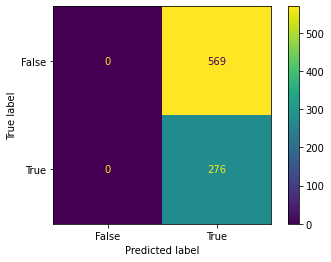

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Actual, Predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()


